In [212]:
import os, io
from google.cloud import vision_v1 as vision
from google.cloud.vision_v1 import types
import pandas as pd
import cv2
import numpy as np
import json
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
# from IPython.display import Image
from enum import Enum
%matplotlib inline

In [213]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'Demz_vision_API_token.json'

In [283]:
FILE_NAME = 'test1.jpg'
FOLDER_PATH = 'C:\\Users\\USER\\Desktop\\NEW_DEMZ\\OCR\\OCR_Works\\Google\\images'

In [284]:
def resize_Image(img):
    scaler = 2
    threshold = 400
    width, height = img.size[:2]
    scale_percent = 60
    
    print(width, height)
    if height < threshold and width < threshold:
        width = int(img.size[0] * scaler)
        height = int(img.size[1] * scaler)
        img = img.resize((width, height), Image.ANTIALIAS)
#         img.save('resized.jpg')
    else:
        width = int(img.size[0] * scale_percent / 100)
        height = int(img.size[1] * scale_percent / 100)
        img = img.resize((width,height), Image.ANTIALIAS)
        print(hsize)
#         img.save('resized.jpg')
    return img

In [285]:
img = Image.open(os.path.join(FOLDER_PATH, FILE_NAME))
# image = resize_Image(img)

In [286]:
client = vision.ImageAnnotatorClient()
with io.open(os.path.join(FOLDER_PATH, FILE_NAME), 'rb') as image_file1:
        content = image_file1.read()
content_image = types.Image(content=content)
response = client.text_detection(image=content_image)
response_face = client.face_detection(image=content_image)
tests = response.text_annotations
faceAnnotations = response_face.face_annotations

In [287]:
# def draw_boxes(image, bounds, color,width=2):
#     image = Image.open(image)
#     draw = ImageDraw.Draw(image)
#     for text in bounds:
#         draw.line([
#             text.bounding_poly.vertices[0].x, text.bounding_poly.vertices[0].y,
#             text.bounding_poly.vertices[1].x, text.bounding_poly.vertices[1].y,
#             text.bounding_poly.vertices[2].x, text.bounding_poly.vertices[2].y,
#             text.bounding_poly.vertices[3].x, text.bounding_poly.vertices[3].y,
#             text.bounding_poly.vertices[0].x, text.bounding_poly.vertices[0].y],fill=color, width=width)
#     return image

In [288]:
def draw_boxes(image, bounds,faceAnnotations, color,width=2):
    image = Image.open(image)
#     image = resize_Image(img)
    draw = ImageDraw.Draw(image)
    for text in bounds:
        draw.line([
            text.bounding_poly.vertices[0].x, text.bounding_poly.vertices[0].y,
            text.bounding_poly.vertices[1].x, text.bounding_poly.vertices[1].y,
            text.bounding_poly.vertices[2].x, text.bounding_poly.vertices[2].y,
            text.bounding_poly.vertices[3].x, text.bounding_poly.vertices[3].y,
            text.bounding_poly.vertices[0].x, text.bounding_poly.vertices[0].y],fill=color, width=width)
        txt=text.description
        size = 13
        font=ImageFont.truetype("fonts/arial.ttf",size)
        
#         print('SIZE = ', size)
        draw.text((text.bounding_poly.vertices[0].x, text.bounding_poly.vertices[3].y), txt, font=font, fill="#000")
    for face in faceAnnotations:
        draw.line([
            face.bounding_poly.vertices[0].x, face.bounding_poly.vertices[0].y,
            face.bounding_poly.vertices[1].x, face.bounding_poly.vertices[1].y,
            face.bounding_poly.vertices[2].x, face.bounding_poly.vertices[2].y,
            face.bounding_poly.vertices[3].x, face.bounding_poly.vertices[3].y,
            face.bounding_poly.vertices[0].x, face.bounding_poly.vertices[0].y],fill='yellow', width=width)
        txt='Face'
        size = 13
        font=ImageFont.truetype("fonts/arial.ttf",size)
        draw.text((face.bounding_poly.vertices[0].x, face.bounding_poly.vertices[3].y), txt, font=font, fill="#000")
#     image.save('output4.jpg', 'JPEG')
    return image

In [289]:
# img_loc = "images/test1.jpg"
# Image(img_loc)
image = Image.open(os.path.join(FOLDER_PATH, FILE_NAME))

In [290]:
draw = ImageDraw.Draw(image)

In [291]:
def get_bounds(tests, faceAnnotations):
    text_bounds = []
    face_bounds = []
    contents = []
    threshold = 30
    df = pd.DataFrame(columns=["Text", "BoundingPolly"])
    for text in tests:
        print(text.description)
        if len(text.description) < threshold:
            vertices = ([[vertex.x, vertex.y] for vertex in text.bounding_poly.vertices])
            text_bounds.append(vertices)
            contents.append([[text.description],[vertices]])
            df = df.append(
                dict(
                    Text=text.description,
                    BoundingPolly = vertices
            ),
            ignore_index=True
        )
    for face in faceAnnotations:
        face_vertices = (['({0},{1})'.format(vertex.x, vertex.y) for vertex in face.bounding_poly.vertices])
        face_bounds.append(face_vertices)
        print('')
        print('Face bound: {0}'.format(', '.join(face_vertices)))
        print('')
    print('contents : ',contents)
    return text_bounds, face_bounds, contents, df

In [292]:
text_bounds, face_bounds, contents, df = get_bounds(tests, faceAnnotations)

Licensed London
Private Hire Driver
HIVATE HR
|180567
Yasin Sheikh
Noor
Expiry Date: 16/12/2023

Licensed
London
Private
Hire
Driver
HIVATE
HR
|180567
Yasin
Sheikh
Noor
Expiry
Date:
16/12/2023

Face bound: (37,91), (104,91), (104,168), (37,168)

contents :  [[['Licensed'], [[[82, 36], [141, 36], [141, 54], [82, 54]]]], [['London'], [[[147, 36], [195, 36], [195, 54], [147, 54]]]], [['Private'], [[[88, 56], [130, 56], [130, 66], [88, 66]]]], [['Hire'], [[[136, 56], [160, 56], [160, 66], [136, 66]]]], [['Driver'], [[[166, 56], [203, 56], [203, 66], [166, 66]]]], [['HIVATE'], [[[35, 47], [58, 47], [58, 58], [35, 58]]]], [['HR'], [[[60, 47], [70, 47], [70, 58], [60, 58]]]], [['|180567'], [[[117, 83], [195, 83], [195, 102], [117, 102]]]], [['Yasin'], [[[117, 112], [150, 112], [150, 120], [117, 120]]]], [['Sheikh'], [[[157, 111], [199, 111], [199, 120], [157, 120]]]], [['Noor'], [[[118, 125], [156, 125], [156, 135], [118, 135]]]], [['Expiry'], [[[117, 144], [158, 144], [158, 156], [117, 156]]

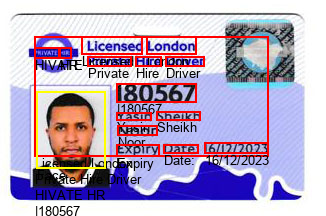

In [293]:
draw_boxes(os.path.join(FOLDER_PATH, FILE_NAME),tests, faceAnnotations, 'red')

In [294]:
def Sort(sub_li): 
    l = len(sub_li) 
    for i in range(0, l): 
#         print(l-i-1)
        for j in range(0, l-i-1): 
#             print(sub_li[j][1][0][0][0])
            if (sub_li[j][1][0][2][-1] >= sub_li[j + 1][1][0][2][-1] and sub_li[j][1][0][-1][0] >= sub_li[j + 1][1][0][-1][0]): 
                tempo = sub_li[j] 
                sub_li[j]= sub_li[j + 1] 
                sub_li[j + 1]= tempo 
    return sub_li 

In [295]:
print(contents[5][1][0][2][-1])

# all_contents = contents.pop(0)
# all_contents

58


In [296]:
Sort(contents)

[[['Licensed'], [[[82, 36], [141, 36], [141, 54], [82, 54]]]],
 [['London'], [[[147, 36], [195, 36], [195, 54], [147, 54]]]],
 [['HIVATE'], [[[35, 47], [58, 47], [58, 58], [35, 58]]]],
 [['HR'], [[[60, 47], [70, 47], [70, 58], [60, 58]]]],
 [['Private'], [[[88, 56], [130, 56], [130, 66], [88, 66]]]],
 [['Hire'], [[[136, 56], [160, 56], [160, 66], [136, 66]]]],
 [['Driver'], [[[166, 56], [203, 56], [203, 66], [166, 66]]]],
 [['|180567'], [[[117, 83], [195, 83], [195, 102], [117, 102]]]],
 [['Yasin'], [[[117, 112], [150, 112], [150, 120], [117, 120]]]],
 [['Sheikh'], [[[157, 111], [199, 111], [199, 120], [157, 120]]]],
 [['Noor'], [[[118, 125], [156, 125], [156, 135], [118, 135]]]],
 [['Expiry'], [[[117, 144], [158, 144], [158, 156], [117, 156]]]],
 [['Date:'], [[[164, 144], [197, 144], [197, 153], [164, 153]]]],
 [['16/12/2023'], [[[205, 142], [267, 142], [267, 153], [205, 153]]]]]

In [239]:
for i in Sort(contents):
    print(i[1])
    

82
147
35
60
88
136
166
117
117
157
118
164
205
82
147
35
60
88
136
166
117
117
157
118
164
82
147
35
60
88
136
166
117
117
157
118
82
147
35
60
88
136
166
117
117
157
82
147
35
60
88
136
166
117
117
82
147
35
60
88
136
166
117
82
147
35
60
88
136
166
82
147
35
60
88
136
82
147
35
60
88
82
147
35
60
82
147
35
82
147
82
[[[82, 36], [141, 36], [141, 54], [82, 54]]]
[[[147, 36], [195, 36], [195, 54], [147, 54]]]
[[[35, 47], [58, 47], [58, 58], [35, 58]]]
[[[60, 47], [70, 47], [70, 58], [60, 58]]]
[[[88, 56], [130, 56], [130, 66], [88, 66]]]
[[[136, 56], [160, 56], [160, 66], [136, 66]]]
[[[166, 56], [203, 56], [203, 66], [166, 66]]]
[[[117, 83], [195, 83], [195, 102], [117, 102]]]
[[[117, 112], [150, 112], [150, 120], [117, 120]]]
[[[157, 111], [199, 111], [199, 120], [157, 120]]]
[[[118, 125], [156, 125], [156, 135], [118, 135]]]
[[[164, 144], [197, 144], [197, 153], [164, 153]]]
[[[205, 142], [267, 142], [267, 153], [205, 153]]]
[[[117, 144], [158, 144], [158, 156], [117, 156]]]


In [204]:
sort_orders = sorted(contents, key=lambda x: x[1][1][0][2][-1], reverse=True)

IndexError: list index out of range

In [163]:
sort_orders

[[['16/12/2023'], [[[205, 142], [267, 142], [267, 153], [205, 153]]]],
 [['Driver'], [[[166, 56], [203, 56], [203, 66], [166, 66]]]],
 [['Date:'], [[[164, 144], [197, 144], [197, 153], [164, 153]]]],
 [['Sheikh'], [[[157, 111], [199, 111], [199, 120], [157, 120]]]],
 [['London'], [[[147, 36], [195, 36], [195, 54], [147, 54]]]],
 [['Hire'], [[[136, 56], [160, 56], [160, 66], [136, 66]]]],
 [['Noor'], [[[118, 125], [156, 125], [156, 135], [118, 135]]]],
 [['Expiry'], [[[117, 144], [158, 144], [158, 156], [117, 156]]]],
 [['Yasin'], [[[117, 112], [150, 112], [150, 120], [117, 120]]]],
 [['|180567'], [[[117, 83], [195, 83], [195, 102], [117, 102]]]],
 [['Private'], [[[88, 56], [130, 56], [130, 66], [88, 66]]]],
 [['Licensed'], [[[82, 36], [141, 36], [141, 54], [82, 54]]]],
 [['HR'], [[[60, 47], [70, 47], [70, 58], [60, 58]]]],
 [['HIVATE'], [[[35, 47], [58, 47], [58, 58], [35, 58]]]],
 [['Licensed London\nPrivate Hire Driver\nHIVATE HR\n|180567\nYasin Sheikh\nNoor\nExpiry Date: 16/12/2023\

In [68]:
df

,Text,BoundingPolly
0,Licensed London\nPrivate Hire Driver\nHIVATE H...,"[(35,36), (267,36), (267,156), (35,156)]"
1,Licensed,"[(82,36), (141,36), (141,54), (82,54)]"
2,London,"[(147,36), (195,36), (195,54), (147,54)]"
3,Private,"[(88,56), (130,56), (130,66), (88,66)]"
4,Hire,"[(136,56), (160,56), (160,66), (136,66)]"
5,Driver,"[(166,56), (203,56), (203,66), (166,66)]"
6,HIVATE,"[(35,47), (58,47), (58,58), (35,58)]"
7,HR,"[(60,47), (70,47), (70,58), (60,58)]"
8,|180567,"[(117,83), (195,83), (195,102), (117,102)]"
9,Yasin,"[(117,112), (150,112), (150,120), (117,120)]"


In [70]:
print(contents[1][1])

[['(82,36)', '(141,36)', '(141,54)', '(82,54)']]
